# Network Centrality Measures for Complex Systems

In this tutorial, we explore three fundamental centrality measures that help identify the most important nodes in complex networks:

1. **Degree Centrality** – counts immediate connections, identifying local influencers
2. **Closeness Centrality** – measures how efficiently a node can reach all others in the network
3. **Betweenness Centrality** – quantifies a node's control over information flow between other nodes

We'll use Zachary's Karate Club network and additional examples to illustrate these concepts with detailed descriptions, mathematical formulations, code examples, and real-world interpretations.

In [1]:
%matplotlib inline
import networkx as nx
import matplotlib.pyplot as plt

# Set up plot style
plt.style.use('seaborn-v0_8-whitegrid')
plt.rcParams['figure.figsize'] = (10, 6)

## Dataset: Zachary's Karate Club

We load Zachary's Karate Club network which represents social interactions in a karate club. This real-world network captures the interactions between 34 members of a karate club observed by Wayne Zachary in the 1970s. During the study, a conflict arose between the administrator and the instructor, splitting the club into two factions. This makes it an excellent example for studying community structure and node importance in social networks.

Nodes: 34, Edges: 78


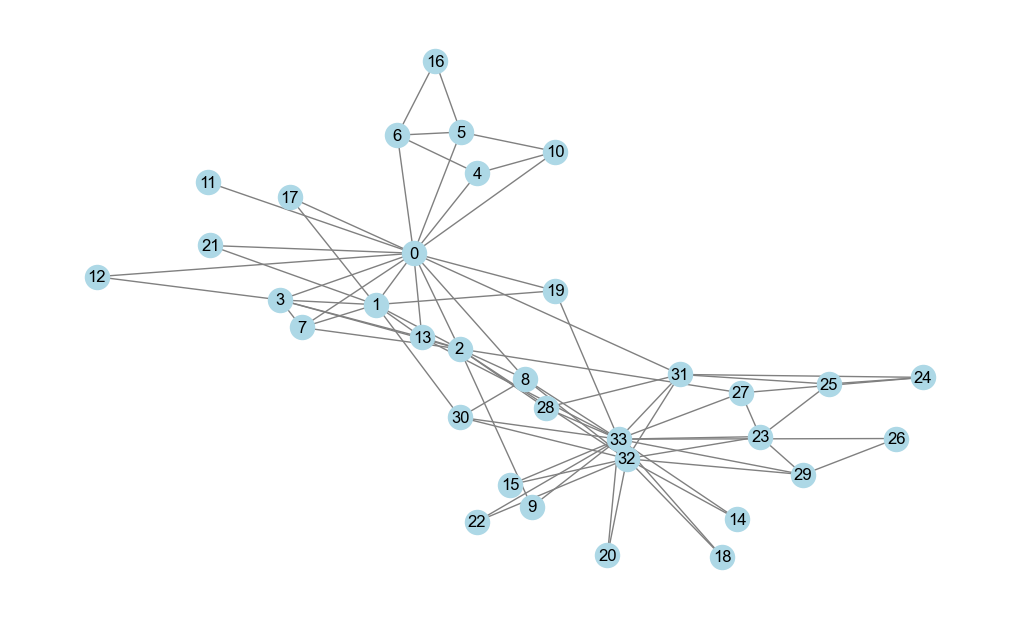

In [2]:
# Load the Karate Club network
G = nx.karate_club_graph()
print(f"Nodes: {G.number_of_nodes()}, Edges: {G.number_of_edges()}")

# Generate layout for plotting
pos = nx.spring_layout(G, seed=42)

# Basic visualization
nx.draw(G, pos, with_labels=True, node_color='lightblue', edge_color='gray', node_size=300)

## 1. Degree Centrality

Degree centrality is one of the most intuitive measures of node importance. It simply counts the number of direct connections (neighbors) each node has. It highlights nodes with immediate influence (local hubs).

### Mathematical Definition

For an undirected graph, the degree centrality of node $v$ is defined as:

$$C_D(v) = \frac{deg(v)}{n-1}$$

Where:
- $deg(v)$ is the degree of node $v$ (number of edges connected to $v$)
- $n$ is the total number of nodes in the network
- $n-1$ is the maximum possible degree (normalization factor)

For directed graphs, we can calculate in-degree centrality (incoming connections) and out-degree centrality (outgoing connections) separately.

### Real-World Interpretations:

- **Social Networks**: High degree centrality often indicates popular individuals with many direct contacts. These individuals may be influential in spreading information or opinions quickly within their immediate circle.
- **Transportation Networks**: Airports with high degree centrality serve many direct destinations. Examples include major hubs like Atlanta, Chicago, or London Heathrow.
- **Communication Networks**: Nodes with high degree centrality represent communication points that directly connect to many others, potentially indicating important servers or routers.
- **Limitations**: Degree centrality only considers direct connections and not a node's strategic position in the overall network structure.

Top Degree Centrality Nodes: [(33, 0.5151515151515151), (0, 0.48484848484848486), (32, 0.36363636363636365)]


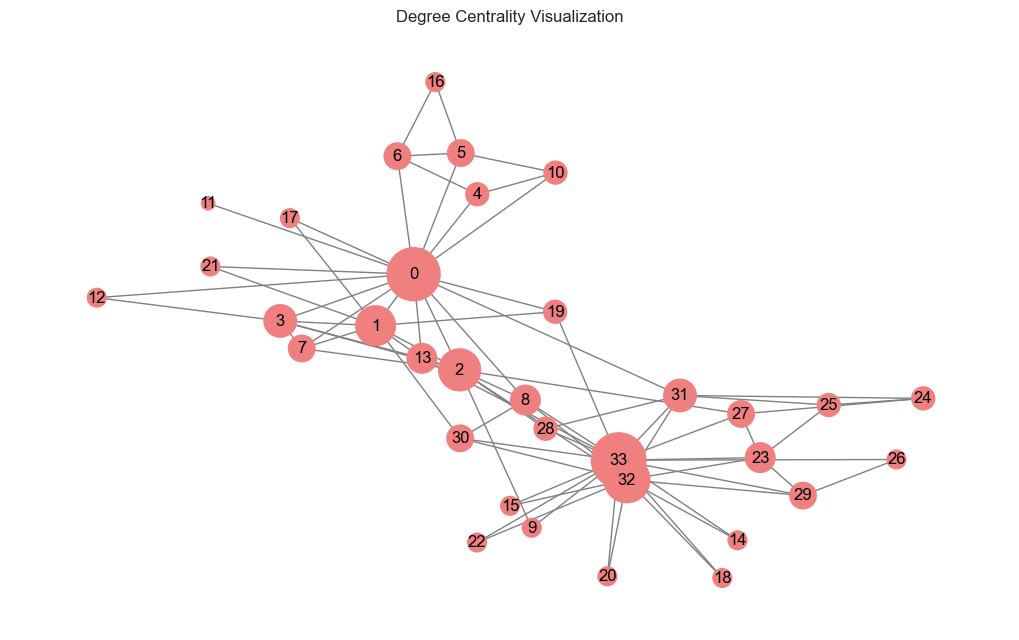

In [3]:
# Compute degree centrality
deg_centrality = nx.degree_centrality(G)

# Find the top 3 nodes by degree centrality
top_deg = sorted(deg_centrality.items(), key=lambda x: x[1], reverse=True)[:3]
print('Top Degree Centrality Nodes:', top_deg)

# Visualize: Node sizes proportional to degree centrality
node_sizes = [deg_centrality[node]*3000 for node in G.nodes()]
nx.draw(G, pos, with_labels=True, node_color='lightcoral', node_size=node_sizes, edge_color='gray')
plt.title('Degree Centrality Visualization')
plt.show()

## 2. Closeness Centrality

Closeness centrality measures how short the shortest paths are from a node to all other nodes in the network. It captures the node's efficiency in disseminating information to the entire network.

### Mathematical Definition

The closeness centrality of node $v$ is defined as:

$$C_C(v) = \frac{n-1}{\sum_{u \neq v} d(v,u)}$$

Where:
- $d(v,u)$ is the shortest path distance between nodes $v$ and $u$
- $n$ is the total number of nodes in the network
- $n-1$ is a normalization factor

For disconnected graphs, NetworkX computes the closeness of a node $v$ as:

$$C_C(v) = \frac{n_v-1}{n-1} \cdot \frac{n_v-1}{\sum_{u \neq v} d(v,u)}$$

Where $n_v$ is the size of the connected component containing node $v$.

### Real-World Interpretations:

- **Emergency Services**: Facilities with high closeness centrality can quickly reach all locations in a city, making them ideal for emergency response centers or hospitals.
- **Information Diffusion**: In communication networks, nodes with high closeness can efficiently broadcast information to the entire network with minimal delay.
- **Supply Chain Management**: Distribution centers with high closeness centrality minimize delivery time across the entire supply chain network.
- **Organizational Networks**: Employees with high closeness centrality can access and share information efficiently throughout the organization.

Top Closeness Centrality Nodes: [(0, 0.5689655172413793), (2, 0.559322033898305), (33, 0.55)]


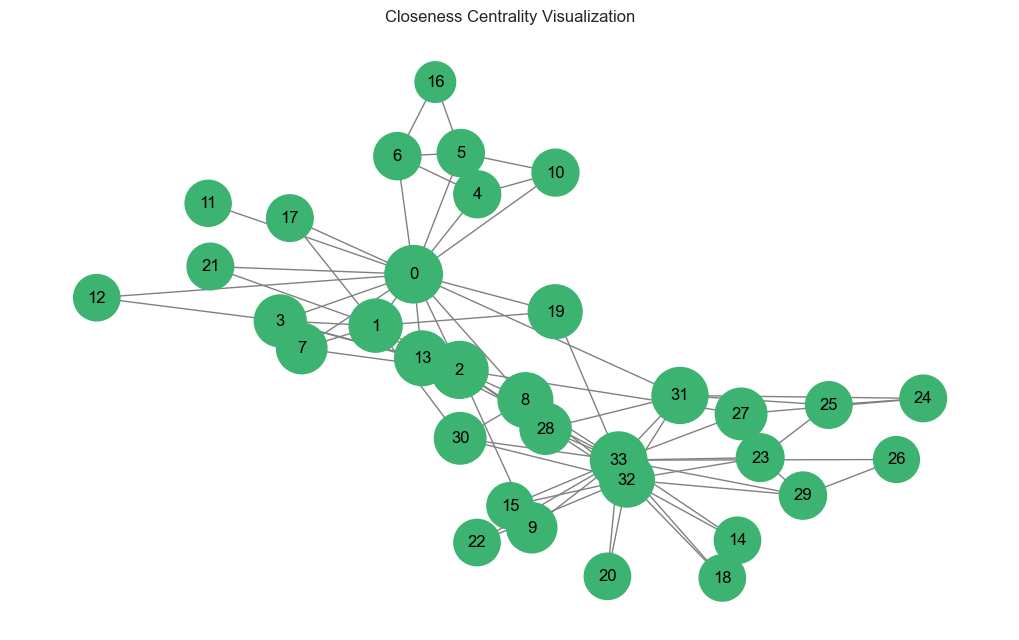

In [4]:
# Compute closeness centrality
close_centrality = nx.closeness_centrality(G)

# Find top nodes by closeness centrality
top_close = sorted(close_centrality.items(), key=lambda x: x[1], reverse=True)[:3]
print('Top Closeness Centrality Nodes:', top_close)

# Visualize: Node sizes proportional to closeness centrality
node_sizes = [close_centrality[node]*3000 for node in G.nodes()]
nx.draw(G, pos, with_labels=True, node_color='mediumseagreen', node_size=node_sizes, edge_color='gray')
plt.title('Closeness Centrality Visualization')
plt.show()

## 3. Betweenness Centrality

Betweenness centrality quantifies how often a node lies on the shortest path between other nodes. It identifies nodes that act as bridges or gatekeepers, controlling information flow between different parts of the network.

### Mathematical Definition

The betweenness centrality of node $v$ is defined as:

$$C_B(v) = \sum_{s \neq v \neq t} \frac{\sigma_{st}(v)}{\sigma_{st}}$$

Where:
- $\sigma_{st}$ is the total number of shortest paths from node $s$ to node $t$
- $\sigma_{st}(v)$ is the number of those paths that pass through node $v$

The normalized betweenness centrality is:

$$C'_B(v) = \frac{C_B(v)}{\frac{(n-1)(n-2)}{2}}$$

Where the denominator represents the maximum possible betweenness for an undirected graph.

### Real-World Interpretations:

- **Social Networks**: Individuals with high betweenness centrality often connect otherwise separate social circles. They facilitate communication between different communities and have access to diverse information.
- **Transportation Networks**: Cities or intersections with high betweenness centrality are critical junctions where traffic flows between regions. Their removal would significantly disrupt the transportation system.
- **Organizational Networks**: Employees with high betweenness centrality often serve as brokers between different departments. They integrate different expertise and knowledge domains.
- **Communication Networks**: Routers or servers with high betweenness centrality handle traffic between different network segments. They represent potential bottlenecks whose failure could partition the network.

Top Betweenness Centrality Nodes: [(0, 0.43763528138528146), (33, 0.30407497594997596), (32, 0.145247113997114)]


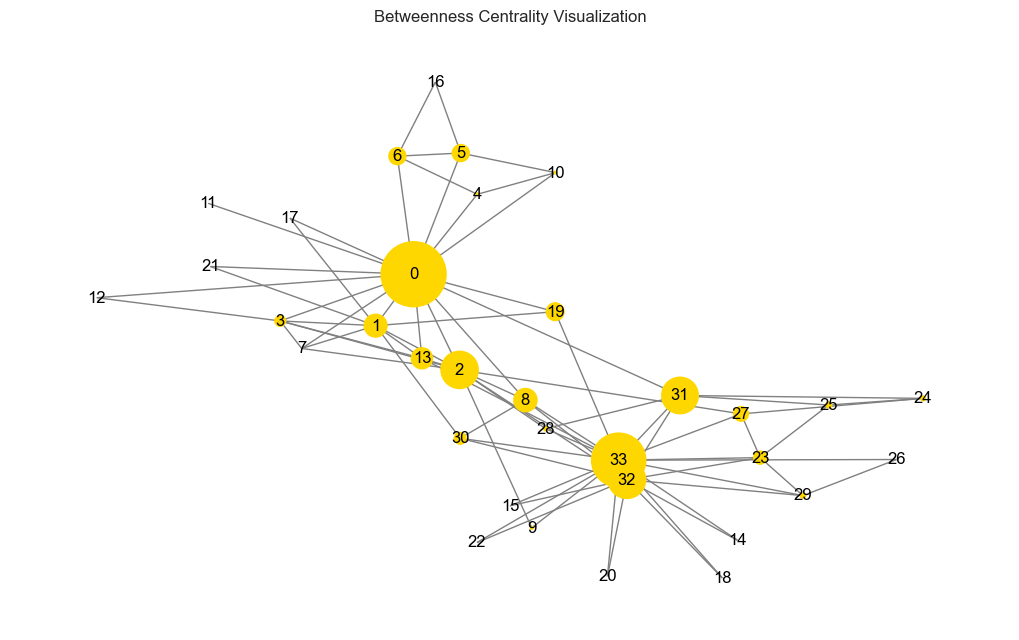

In [5]:
# Compute betweenness centrality
btwn_centrality = nx.betweenness_centrality(G)

# Find top nodes by betweenness centrality
top_btwn = sorted(btwn_centrality.items(), key=lambda x: x[1], reverse=True)[:3]
print('Top Betweenness Centrality Nodes:', top_btwn)

# Visualize: Node sizes proportional to betweenness centrality
node_sizes = [btwn_centrality[node]*5000 for node in G.nodes()]
nx.draw(G, pos, with_labels=True, node_color='gold', node_size=node_sizes, edge_color='gray')
plt.title('Betweenness Centrality Visualization')
plt.show()

### Theoretical Background for Centrality Measures

**Degree Centrality:**

$$
C_D(v) = \frac{\text{degree}(v)}{N-1}
$$

This measure reflects immediate influence. For example, in a social network, high degree centrality might correlate with popularity.

**Closeness Centrality:**

$$
C_C(v) = \frac{N-1}{\sum_{u \neq v} d(v,u)}
$$

A node with high closeness centrality can reach all others quickly and is considered strategically placed for spreading information.

**Betweenness Centrality:**

$$
C_B(v) = \sum_{s \neq v \neq t} \frac{\sigma_{st}(v)}{\sigma_{st}}
$$

Here, $\sigma_{st}$ is the total number of shortest paths from node $s$ to node $t$ and $\sigma_{st}(v)$ is the count of those paths that pass through $v$. Nodes with high betweenness often act as bridges between different clusters or groups.

Such formulas help quantify the notion of 'importance' and determine appropriate strategies in areas ranging from viral marketing to infrastructure security.

### Practical Example and Interpretation Using Zachary's Karate Club Network

Consider the Karate Club network: 

- Nodes with high **degree centrality**, such as the club leaders (nodes 0 and 33), have many direct connections. These are the instructor and administrator who have direct social ties with many club members.
- Nodes with high **closeness centrality** are positioned so that they minimize the distance to all other members, making them effective at rapidly disseminating information. In a club setting, these individuals can quickly spread news or rumors to everyone.
- High **betweenness centrality** nodes serve as vital connectors between different subgroups, ensuring or controlling the flow of communication. In the context of the club split, these individuals might be able to mediate between the two forming factions.

These measures guide decisions such as identifying key influencers in social networks or determining critical points in transportation systems.

## Additional Example: Scientific Collaboration Network

Let's consider a hypothetical scientific collaboration network, where:

- **Degree Centrality**: Scientists with many collaborators (high degree centrality) may be prolific researchers who work with many different teams. However, they might not necessarily be the most influential in connecting different research fields.

- **Closeness Centrality**: Researchers with high closeness centrality can efficiently disseminate their ideas across the scientific community. They may be working in foundational areas with applications in many fields, allowing their work to reach diverse scientific domains quickly.

- **Betweenness Centrality**: Scientists with high betweenness centrality often work across disciplines, connecting otherwise separate research communities. They facilitate interdisciplinary research and the transfer of methods between fields. For example, a researcher applying machine learning techniques to biology might have high betweenness centrality as they bridge computer science and biological sciences.

This example illustrates how different centrality measures highlight different aspects of node importance in the same network.

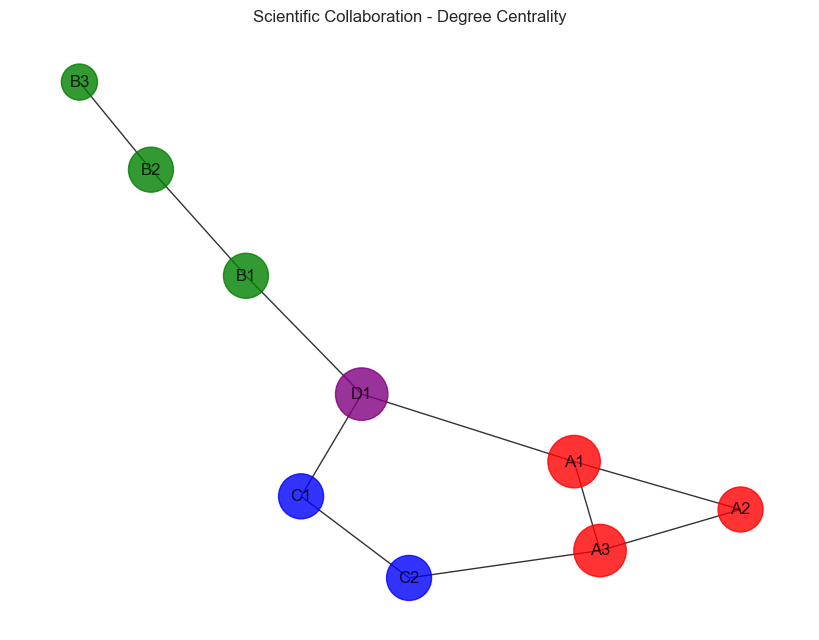

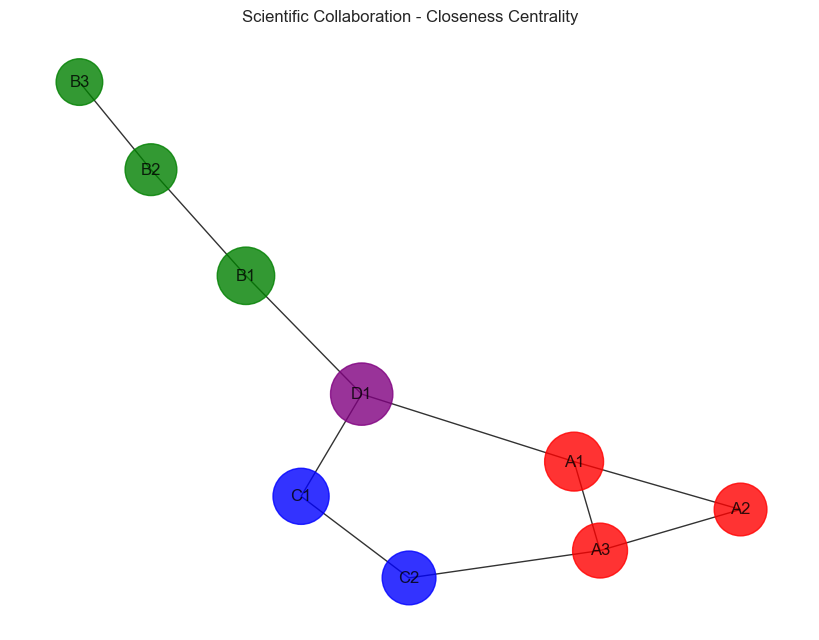

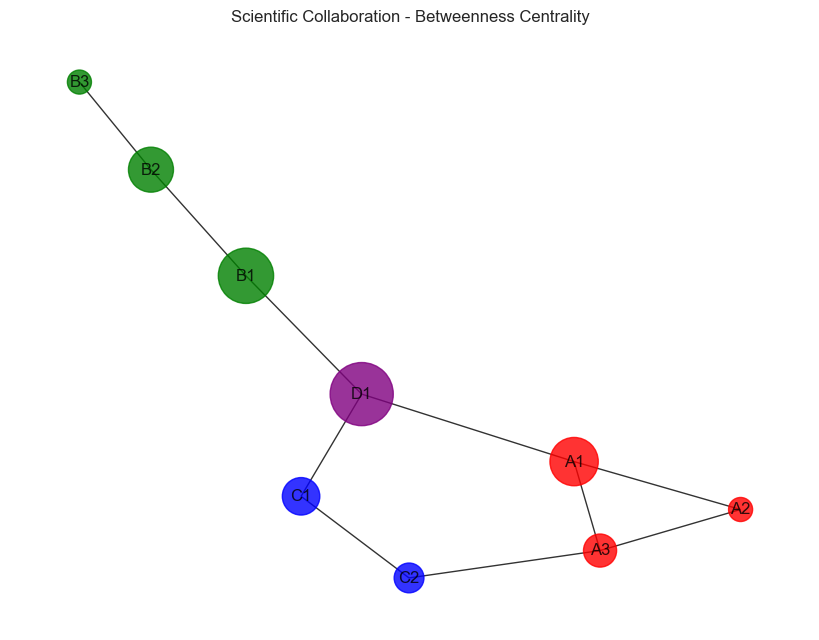

Top Degree Centrality: [('A1', 0.375), ('A3', 0.375)]
Top Closeness Centrality: [('D1', 0.5714285714285714), ('A1', 0.5)]
Top Betweenness Centrality: [('D1', 0.5892857142857143), ('B1', 0.42857142857142855)]


In [6]:
# Create a small demonstration network representing scientific collaborations
SG = nx.Graph()

# Add nodes representing researchers from different fields
researchers = {
    'A1': 'Physics', 'A2': 'Physics', 'A3': 'Physics',  # Physics researchers
    'B1': 'Biology', 'B2': 'Biology', 'B3': 'Biology',  # Biology researchers
    'C1': 'Computer Science', 'C2': 'Computer Science',  # CS researchers
    'D1': 'Interdisciplinary'  # Interdisciplinary researcher
}

# Add nodes with field attributes
for researcher, field in researchers.items():
    SG.add_node(researcher, field=field)

# Add collaboration edges within fields
SG.add_edges_from([('A1', 'A2'), ('A2', 'A3'), ('A1', 'A3'),  # Physics collaborations
                   ('B1', 'B2'), ('B2', 'B3'),  # Biology collaborations
                   ('C1', 'C2')])  # CS collaborations

# Add interdisciplinary collaborations
SG.add_edges_from([('D1', 'A1'), ('D1', 'B1'), ('D1', 'C1')])

# Add one cross-field collaboration
SG.add_edge('A3', 'C2')

# Compute centrality measures
sci_degree = nx.degree_centrality(SG)
sci_closeness = nx.closeness_centrality(SG)
sci_betweenness = nx.betweenness_centrality(SG)

# Create position layout
sci_pos = nx.spring_layout(SG, seed=42)

# Function to visualize with different centrality measures
def plot_centrality(G, pos, centrality_dict, title):
    plt.figure(figsize=(8, 6))
    node_sizes = [centrality_dict[node] * 3000 + 300 for node in G.nodes()]
    node_colors = ['red' if G.nodes[node]['field'] == 'Physics' else
                 'green' if G.nodes[node]['field'] == 'Biology' else
                 'blue' if G.nodes[node]['field'] == 'Computer Science' else
                 'purple' for node in G.nodes()]
    nx.draw(G, pos, with_labels=True, node_size=node_sizes, node_color=node_colors, alpha=0.8)
    plt.title(title)
    plt.show()

# Visualize the three centrality measures
plot_centrality(SG, sci_pos, sci_degree, 'Scientific Collaboration - Degree Centrality')
plot_centrality(SG, sci_pos, sci_closeness, 'Scientific Collaboration - Closeness Centrality')
plot_centrality(SG, sci_pos, sci_betweenness, 'Scientific Collaboration - Betweenness Centrality')

# Print top nodes for each measure
print("Top Degree Centrality:", sorted(sci_degree.items(), key=lambda x: x[1], reverse=True)[:2])
print("Top Closeness Centrality:", sorted(sci_closeness.items(), key=lambda x: x[1], reverse=True)[:2])
print("Top Betweenness Centrality:", sorted(sci_betweenness.items(), key=lambda x: x[1], reverse=True)[:2])

## Comparison of Centrality Measures in Complex Systems

Each centrality measure captures a different aspect of node importance:

### Degree Centrality (Local Influence)
- **Focus**: Immediate connections and local influence
- **Advantages**: Simple to calculate and interpret
- **Limitations**: Ignores network structure beyond immediate neighbors
- **Best Use Cases**: Identifying popular individuals, major hubs, or heavily connected components
- **Example Impact**: In epidemic models, high-degree nodes often become superspreaders

### Closeness Centrality (Efficient Communication)
- **Focus**: Efficiency in reaching the entire network
- **Advantages**: Considers global network structure and accessibility
- **Limitations**: Less effective in disconnected or very large networks
- **Best Use Cases**: Facility location, information dissemination, resource distribution
- **Example Impact**: In supply chains, high-closeness locations minimize overall delivery times

### Betweenness Centrality (Control and Brokerage)
- **Focus**: Control over information flow and brokerage between communities
- **Advantages**: Identifies critical bridges and bottlenecks
- **Limitations**: Computationally expensive for large networks
- **Best Use Cases**: Finding gatekeepers, identifying potential points of network failure
- **Example Impact**: In social networks, high-betweenness individuals often have access to diverse information and control information flow between communities

### Choosing the Right Measure

The choice of centrality measure depends on the specific question being asked:

- If you're interested in **immediate influence** → Use degree centrality
- If you're concerned with **efficient information spread** → Use closeness centrality
- If you want to identify **control points** or **bridges** → Use betweenness centrality

In many real-world applications, it's beneficial to compare multiple centrality measures to gain a comprehensive understanding of node importance.

## Case Study: Centrality in Infrastructure Networks

Consider a power grid network where:

- **Substations with high degree centrality** serve many direct connections but might not be critical for the overall grid functioning.
- **Substations with high closeness centrality** can efficiently distribute power across the entire grid with minimal losses.
- **Substations with high betweenness centrality** are critical junctions whose failure could disconnect large portions of the grid.

During power grid planning and protection, engineers might focus on:

1. Ensuring redundancy for high-betweenness nodes to prevent cascading failures
2. Optimizing the placement of new substations based on closeness centrality to improve overall efficiency
3. Monitoring high-degree substations for local overload conditions

This example demonstrates how different centrality measures can guide different aspects of infrastructure planning and risk management.

## Beyond Basic Centrality: Eigenvalue Centrality

While we've focused on the three most common centrality measures, it's worth mentioning **Eigenvalue Centrality** (and its variant PageRank), which incorporates the concept that connections to important nodes contribute more to a node's importance than connections to less important nodes.

### Mathematical Definition

For a node $i$, the eigenvalue centrality is defined as:

$$x_i = \frac{1}{\lambda} \sum_{j} A_{ij} x_j$$

Where:
- $A$ is the adjacency matrix of the graph
- $\lambda$ is a constant (the eigenvalue)
- $x_j$ is the centrality of node $j$ (connected to node $i$)

This recursive definition captures the idea that a node's importance depends on the importance of its neighbors.

### Google's PageRank algorithm is a modified version of eigenvalue centrality that revolutionized web search by determining the importance of web pages based on their link structure.

## Conclusion

This tutorial has explored three fundamental centrality measures—degree, closeness, and betweenness—that provide different perspectives on node importance in complex networks. Key takeaways include:

1. **Complementary Insights**: Different centrality measures highlight different aspects of node importance.
2. **Context Matters**: The most appropriate centrality measure depends on the specific research question and network type.
3. **Practical Applications**: Centrality measures guide decisions in diverse fields including social network analysis, transportation planning, epidemiology, and infrastructure protection.
4. **Mathematical Foundation**: Understanding the mathematical definitions helps interpret centrality values correctly.

As you analyze your own networks, consider using multiple centrality measures to gain a comprehensive understanding of node importance and network structure.

### Further Research

For deeper analysis, consider exploring:
- Other centrality measures like eigenvector centrality and Katz centrality
- Group centrality measures that apply to sets of nodes rather than individual nodes
- Dynamic centrality measures for temporal networks where connections change over time
- Weighted centrality measures that account for connection strength